# Analyising

## Loading 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Raw = pd.read_csv('housing.csv')
Raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
print(type(Raw['RAD']))
print(type(Raw['CHAS']))
Raw['RAD'].value_counts()
Raw['CHAS'].value_counts()

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


CHAS
0    471
1     35
Name: count, dtype: int64

In [4]:
# Getting all the stats info about the data
Raw.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Plotting the Graphs

In [5]:
# Raw.hist(figsize=(20,30), bins=20)

<Axes: >

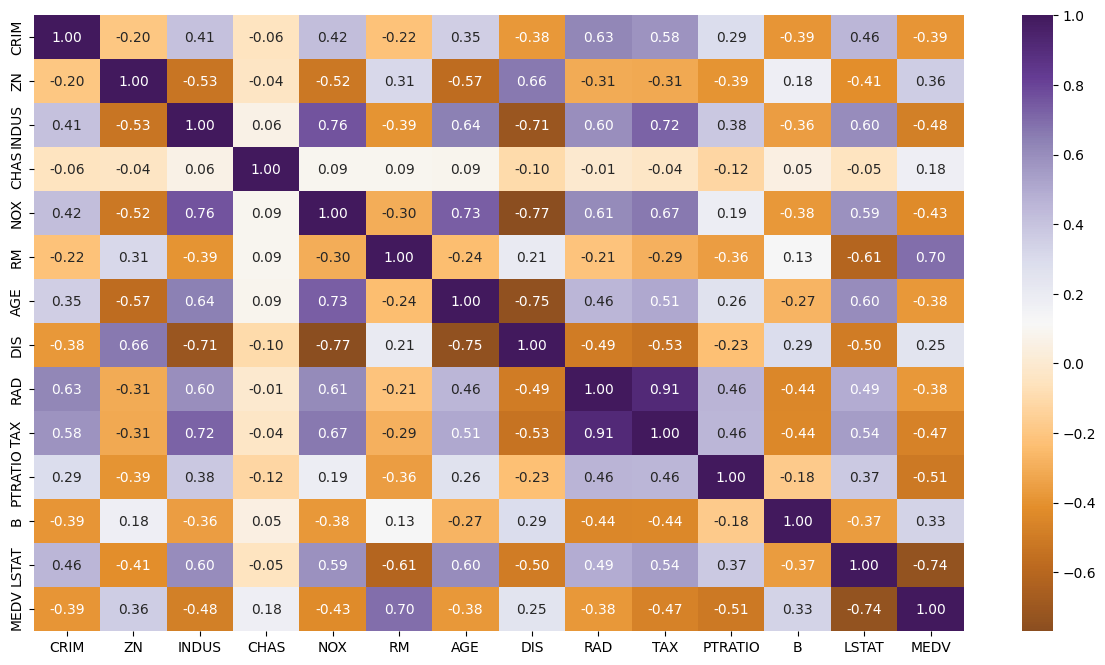

In [29]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(Raw.corr(), cmap= 'PuOr', annot= True, fmt='.2f', alpha=.9)
# plt.show()

## Splitting the Data
And checking the split according to CHAS 

Selectes CHAS as this is a ceegrocial feature and should be distributed evenly

In [7]:
from sklearn.model_selection import train_test_split

Train1, Test1 = train_test_split(Raw, test_size=.2, random_state=np.random.randint(len(Raw)))
print(Train1.shape, Test1.shape)

(404, 14) (102, 14)


Checking the split of the CHAS value by counting the

In [8]:
print("CHAS column in Train", Train1['CHAS'].value_counts())    
print("CHAS column in Test",Test1['CHAS'].value_counts())

CHAS column in Train CHAS
0    374
1     30
Name: count, dtype: int64
CHAS column in Test CHAS
0    97
1     5
Name: count, dtype: int64


#### Stratified Sampling
This is used to sample the data as per some strategy.<br>
Below is a example of Using condition on CHAS for even ditribution.

In [9]:
# This section I am copying and would be a comment only. I don't do this kind of sampling

# from sklearn.model_selection  import StratifiedShuffleSplit
# split = StratifiedShuffleSplit(n_splits=1 , test_size= .2, random_state= 423)
# for trian_idx, test_idx in split.split(Raw, Raw['CHAS']): # CHAS -> any int type
#     st_train = Raw.loc[trian_idx]
#     st_test = Raw.loc[test_idx]

# st_train.info()

## Finding Co-relation

In [11]:
Train1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.220668,0.449511,-0.055405,0.454671,-0.220705,0.371670,-0.417301,0.659615,0.626464,0.322738,-0.337142,0.505656,-0.405164
ZN,-0.220668,1.000000,-0.536925,-0.039791,-0.510282,0.316526,-0.544621,0.651008,-0.321331,-0.322404,-0.407805,0.180327,-0.412769,0.367079
INDUS,0.449511,-0.536925,1.000000,0.070275,0.765760,-0.366257,0.638347,-0.714062,0.622750,0.716422,0.385074,-0.375591,0.592829,-0.468336
CHAS,-0.055405,-0.039791,0.070275,1.000000,0.088192,0.126669,0.109539,-0.117364,-0.004418,-0.026915,-0.106559,0.043550,-0.061270,0.200514
NOX,0.454671,-0.510282,0.765760,0.088192,1.000000,-0.293224,0.735575,-0.782031,0.602396,0.658406,0.170177,-0.392263,0.587151,-0.422542
RM,-0.220705,0.316526,-0.366257,0.126669,-0.293224,1.000000,-0.246307,0.212813,-0.209901,-0.274133,-0.349140,0.131477,-0.607866,0.677219
AGE,0.371670,-0.544621,0.638347,0.109539,0.735575,-0.246307,1.000000,-0.742790,0.459409,0.496045,0.253008,-0.271794,0.603509,-0.379863
DIS,-0.417301,0.651008,-0.714062,-0.117364,-0.782031,0.212813,-0.742790,1.000000,-0.518301,-0.547828,-0.241951,0.299651,-0.502650,0.252013
RAD,0.659615,-0.321331,0.622750,-0.004418,0.602396,-0.209901,0.459409,-0.518301,1.000000,0.926940,0.493501,-0.427270,0.482831,-0.383265
TAX,0.626464,-0.322404,0.716422,-0.026915,0.658406,-0.274133,0.496045,-0.547828,0.926940,1.000000,0.476796,-0.434945,0.523435,-0.453752


Co-relation only for the price column
and aranigng it in decending order

In [14]:
PrcCorr = Raw.corr().MEDV.sort_values(ascending= False)
PrcCorr

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

We can note a high co-relation with **RM, LSTAT** where as modrate co-relation with **PTRatio, INDUS, TAX, NOX**

This means there have very high importance in out dataset

#### Plotting the Relation between the attributes

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>,
        <Axes: xlabel='CHAS', ylabel='MEDV'>,
        <Axes: xlabel='AGE', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='CHAS', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='CHAS', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>],
       [<Axes: xlabel='MEDV', ylabel='CHAS'>,
        <Axes: xlabel='RM', ylabel='CHAS'>,
        <Axes: xlabel='LSTAT', ylabel='CHAS'>,
        <Axes: xlabel='CHAS', ylabel='CHAS'>,
        <Axes: xlabel='AGE', ylabel='CHAS'>],
       [<Axes: xlabel='MEDV', ylabel='AGE'>,
        <Axes: xlabel='RM', ylabel='AGE'>,
 

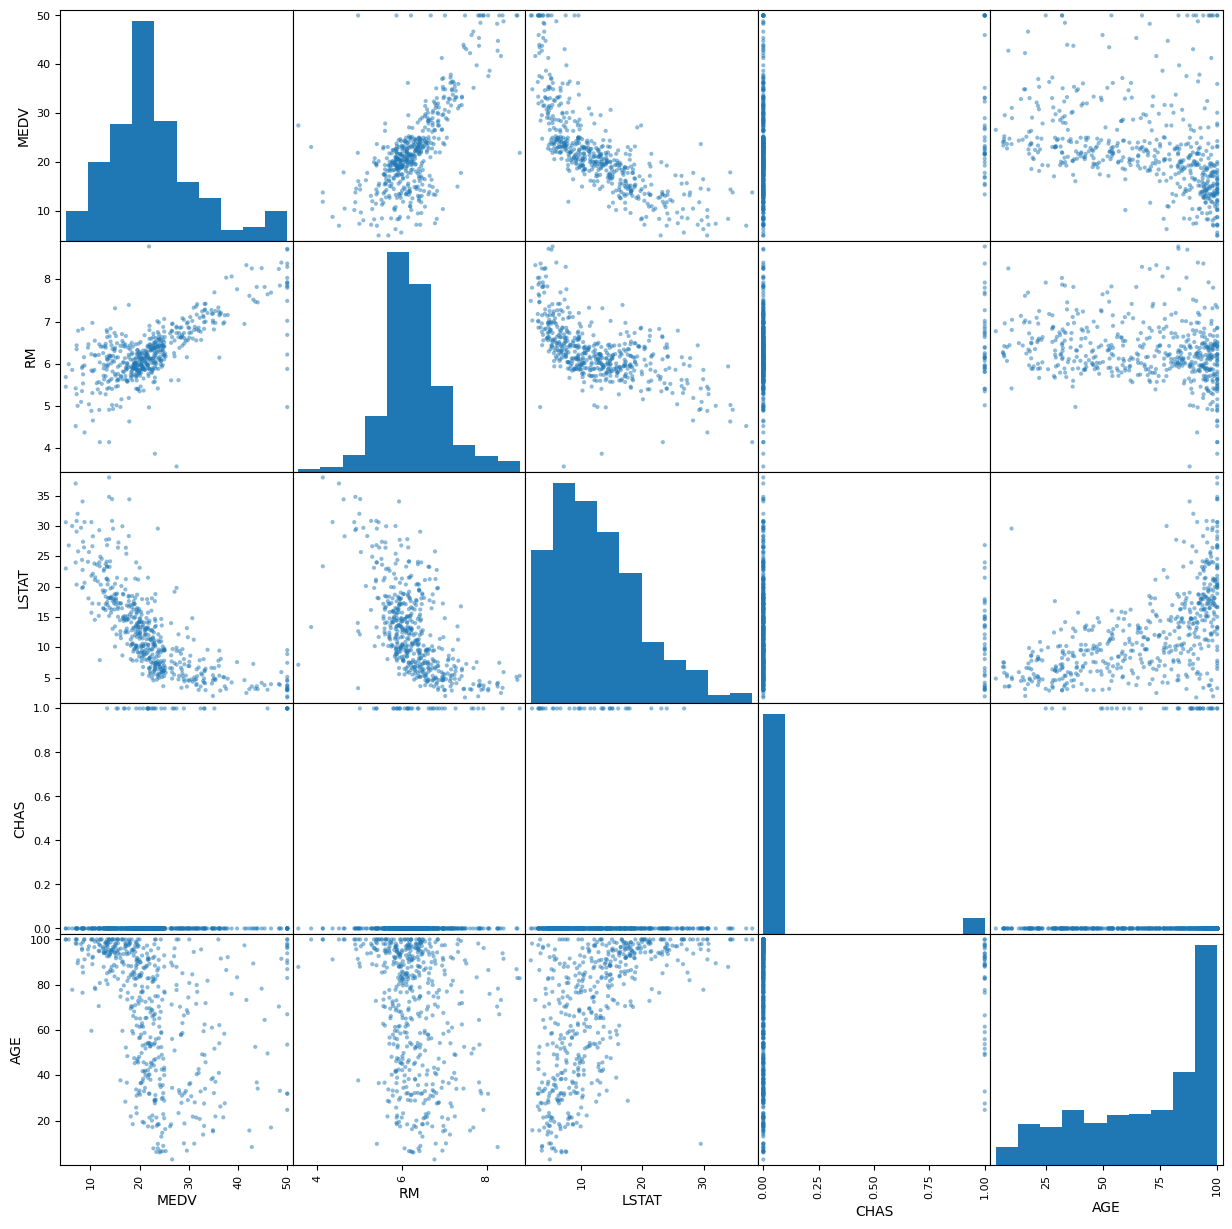

In [32]:
from pandas.plotting import scatter_matrix
# We are selecting the attrib in which we want to see co-relation
Attib = ['MEDV', 'RM', 'LSTAT', 'CHAS', 'AGE']
scatter_matrix(Raw[Attib], figsize=(15,15))